In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import sys
%matplotlib inline

In [53]:
img = cv2.imread('clocks/clock2.png')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [51]:
sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(gray,None)
kp1, des1 = sift.detectAndCompute(gray,None)
gray=cv2.drawKeypoints(gray,kp1,img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

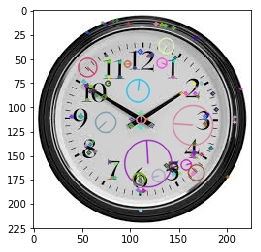

In [52]:
plt.imshow(img, cmap='gray')

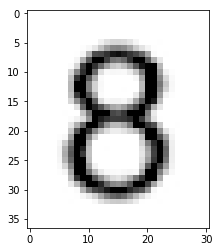

In [6]:
num2 = cv2.cvtColor(cv2.imread('clocks/num8.png'), cv2.COLOR_BGR2GRAY)
plt.imshow(num2, cmap='gray')

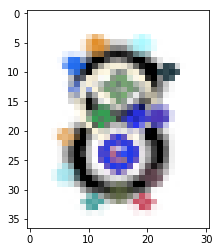

In [7]:
sift2 = cv2.xfeatures2d.SIFT_create()
kp2, des2 = sift2.detectAndCompute(num2,None)
img2=cv2.drawKeypoints(num2,kp2,num2,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img2, cmap='gray')

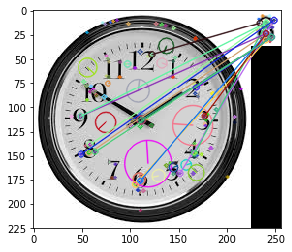

(<matplotlib.image.AxesImage at 0x11b5a77d0>, None)

In [8]:
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)
# Match descriptors.
matches = bf.match(des1,des2)
#Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# # Apply ratio test
# good = []
# for m,n in matches:
#     if m.distance < 0.75*n.distance:
#         good.append([m])
# Draw first 10 matches.
img3 = cv2.drawMatches(img,kp1,img2,kp2,matches[:15], None,flags=2)
plt.imshow(img3),plt.show()

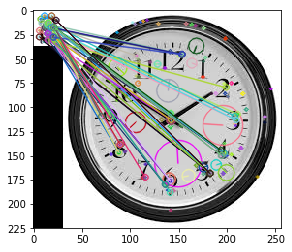

(<matplotlib.image.AxesImage at 0x11b6d1450>, None)

In [9]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des2,des1, k=3)
# Apply ratio test
good = []
for pts in matches:
#     if m.distance < 0.75*n.distance:
    good.append([x for x in pts if x.distance < pts[0].distance * 1.3])
# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img2,kp2,img,kp1,good,None,flags=2)
plt.imshow(img3),plt.show()

In [10]:
from collections import defaultdict
def extract_matches(match_list_matrix, kp1, kp2):
    result = defaultdict(list)
    if len(match_list_matrix):
        if isinstance(match_list_matrix[0], list):
            for dmatch_list in match_list_matrix:
                for dmatch in dmatch_list:
                    result[kp2[dmatch.queryIdx]].append(dmatch)
        else:
            for dmatch in match_list_matrix:
                result[kp2[dmatch.queryIdx]].append(dmatch)
    return result

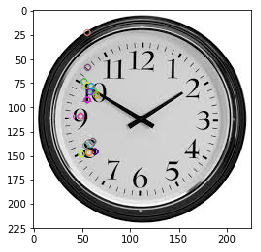

(<matplotlib.image.AxesImage at 0x11557fb50>, None)

In [11]:
result = extract_matches(good, kp2, kp1)
img4=cv2.drawKeypoints(gray,result.keys(), None)
plt.imshow(img4),plt.show()

In [12]:
good_matched_kp = sorted(result.keys(), key=lambda x: min([dmatch.distance for dmatch in result[x]]))[:20]

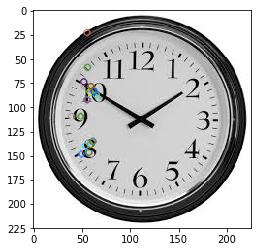

(<matplotlib.image.AxesImage at 0x1073378d0>, None)

In [13]:
img5=cv2.drawKeypoints(gray,good_matched_kp, None)
plt.imshow(img5),plt.show()

In [14]:
len(good_matched_kp)

20

In [21]:
import pickle
contours = pickle.load(open('contours.pk'))

In [22]:
from collections import defaultdict
bb_map = defaultdict(int)
for contour in contours:
    x,y,w,h = cv2.boundingRect(contour)
    bb_map[(x, y, w, h)] = 0

In [23]:
for good_kp in good_matched_kp:
    x_, y_ = good_kp.pt
    for x, y,  w, h in bb_map:
        if x_ >= x and x_ <= x + w and y_ >= y and y_ <= y + h:
            print('aha')
            bb_map[(x, y, w, h)] += 1

aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha
aha


In [39]:
candidate_bb = []
for bb, score in sorted(bb_map.items(), key=lambda x: -x[1]):
    x, y, w, h = bb
    if max(w, h) > max(img.shape)/3:
        continue
    candidate_bb.append(bb)
    if len(candidate_bb) > 3:
        break

In [40]:
candidate_bb

[(58, 133, 6, 8), (51, 137, 15, 17), (47, 102, 10, 21), (41, 100, 16, 25)]

In [42]:
img_w_bb = cv2.drawContours(img,[candidate_bb],0,(0,0,255),2)
plt.imshow(img_w_bb)
plt.show()

TypeError: contours is not a numpy array, neither a scalar

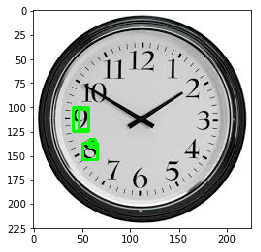

In [57]:
x, y, w, h = candidate_bb[3]
cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(img)
plt.show()